In [461]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

    1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

    2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
    Include any key indicators of model performance.

    3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

## 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?


In [690]:
with open('1481053515_ultimate_challenge/ultimate_challenge/ultimate_data_challenge.json') as f:
    data= json.load(f)

In [691]:
data_df= pd.DataFrame(data)
data_df.head(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0


In [692]:
data_df.tail(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


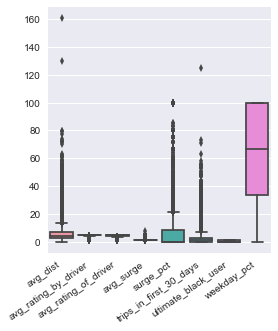

In [693]:
plt.figure(figsize=(12,10))
sns.factorplot(data= data_df, kind='box')
plt.xticks(rotation= 35, ha='right')
plt.show()

In [694]:
# cleaning for easier analysis
data_df= data_df.replace(np.nan, '0')

In [695]:
data_df['is_Astapor'] = np.where(data_df.city == 'Astapor', 1, 0)
data_df['is_Kings'] = np.where(data_df.city == 'King\'s Landing', 1, 0)
data_df['is_Winterfell'] = np.where(data_df.city == 'Winterfell', 1, 0)
data_df['is_iPhone'] = np.where(data_df.phone == 'iPhone', 1, 0)
data_df['is_Android'] = np.where(data_df.phone == 'Android', 1, 0)

In [704]:
data_df.last_trip_date = pd.to_datetime(data_df.last_trip_date, format='%Y-%m-%d')
data_df.signup_date = pd.to_datetime(data_df.signup_date, format='%Y-%m-%d')

In [697]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null object
avg_rating_of_driver      50000 non-null object
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
is_Astapor                50000 non-null int32
is_Kings                  50000 non-null int32
is_Winterfell             50000 non-null int32
is_iPhone                 50000 non-null int32
is_Android                50000 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(4), int32(5), int64

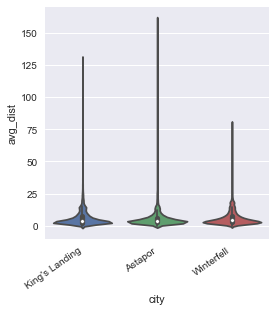

In [476]:
plt.figure(figsize=(17,10))
sns.factorplot(x='city', y= 'avg_dist', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

# Adding retained to  DF

In [703]:
# sorting Dataframe into retained users and non-retained users
retained_df = data_df.loc[data_df['last_trip_date'] >= '2014-06-01']
noretained_df= data_df.loc[data_df['last_trip_date'] < '2014-06-01']

In [699]:
# also added a column in overall df to easily visualize groups that are retained vs. not
data_df['retained'] = np.where(data_df['last_trip_date']>='2014-06-01', True, False)

In [700]:
data_df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_Astapor,is_Kings,is_Winterfell,is_iPhone,is_Android,retained
0,3.67,5,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,0,1,0,True
1,8.26,5,5,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,0,0,0,1,False
2,0.77,5,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,0,1,0,False


In [705]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'avg_rating_by_driver', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

TypeError: '>' not supported between instances of 'float' and 'str'

In [706]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'avg_rating_of_driver', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

TypeError: '>' not supported between instances of 'float' and 'str'

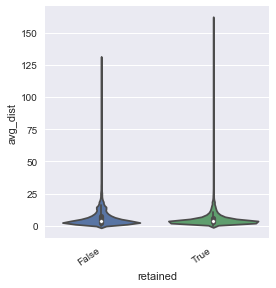

In [646]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'avg_dist', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

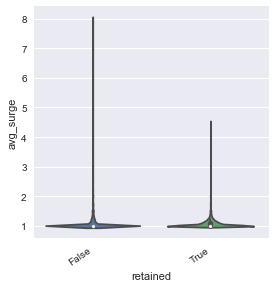

In [483]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'avg_surge', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

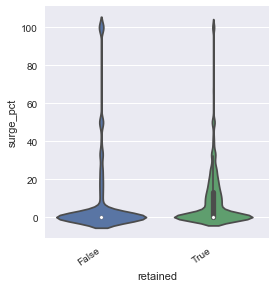

In [484]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'surge_pct', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

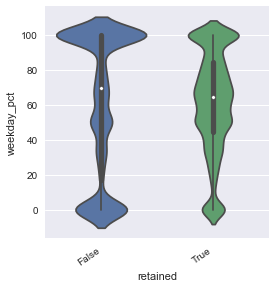

In [485]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'weekday_pct', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

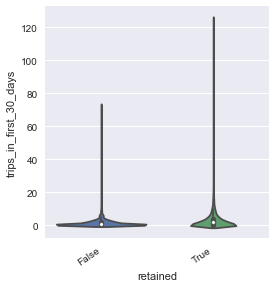

In [486]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'trips_in_first_30_days', data= data_df, kind='violin')
plt.xticks(rotation= 35, ha='right')
plt.show()

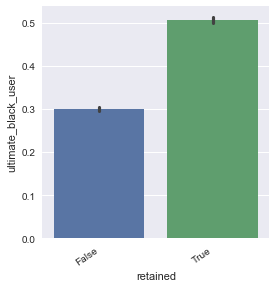

In [487]:
plt.figure(figsize=(17,10))
sns.factorplot(x='retained', y= 'ultimate_black_user', data= data_df, kind='bar')
plt.xticks(rotation= 35, ha='right')
plt.show()

In [488]:
print((data_df['retained'].loc[data_df['retained']== True]).count())

18804


In [489]:
print((data_df['retained'].loc[data_df['retained']== False]).count())

31196


## First thoughts

18,804/50,000 (~37.6%) users were retained over 30 days. From first visualizations I also have two observations, retained users go further distances (at the extreme)- and appear less likely to use a surge. 

Retained users could be those that are more likely to use the ride-share for everyday distances- such as two and from a grocery store- things near their home or work but too far to walk. 

The surge difference may also be based on retained users being more likely to use the ride-sharing app over a period of time- i.e. check if a surge has gone down and not just use Ultimate immeiatly when a surge is present. OR a user who experiences a large surge may be more likely to stop using the app within the 6 month window between when these users signed up (January 2017) and when the data was pulled (July 1st, 2017)

## 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?

Include any key indicators of model performance.

In [707]:
data_df= data_df.sort_values('last_trip_date', ascending= False)
data_df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_Astapor,is_Kings,is_Winterfell,is_iPhone,is_Android,retained
4486,11.94,5,5,1.00,Winterfell,2014-07-01,Android,2014-01-25,0.0,4,True,25.0,0,0,1,0,1,True
43047,5.49,4.7,5,1.01,King's Landing,2014-07-01,iPhone,2014-01-15,0.8,1,True,89.3,0,1,0,1,0,True
24059,8.62,4.9,4.3,1.11,Astapor,2014-07-01,iPhone,2014-01-24,14.3,1,False,71.4,1,0,0,1,0,True
40290,7.51,4.8,4.9,1.02,King's Landing,2014-07-01,iPhone,2014-01-07,1.6,2,True,95.2,0,1,0,1,0,True
28689,16.32,5,5,1.00,King's Landing,2014-07-01,iPhone,2014-01-16,0.0,5,False,75.0,0,1,0,1,0,True
41544,3.16,4.8,5,1.11,Winterfell,2014-07-01,iPhone,2014-01-22,12.7,7,True,52.1,0,0,1,1,0,True
44457,2.34,4.7,4.8,1.00,Winterfell,2014-07-01,iPhone,2014-01-13,0.0,9,False,91.7,0,0,1,1,0,True
21699,4.35,4.7,3.4,1.00,Winterfell,2014-07-01,iPhone,2014-01-13,0.0,4,True,66.7,0,0,1,1,0,True
15631,3.29,4.9,4.5,1.15,King's Landing,2014-07-01,iPhone,2014-01-15,27.8,0,False,91.7,0,1,0,1,0,True
33653,7.55,5,4.3,1.00,Winterfell,2014-07-01,iPhone,2014-01-07,0.0,1,True,50.0,0,0,1,1,0,True


I am going to use a Supervised learning machine model because we are looking for a given predicted variable-  specifically wether or not a user is retained. 

Specifically I will use a Log regression model to identify the best singular predictor-  not a complex multi-dimensional clustering but singular effect on the dependent variable (i.e. customer retension in 6+ months). 

Log works well because it is simple to understand for the person I am presenting the data too, looks at binery effects (yes, or no as a continued user) and is a computationally inexpensive model- so I can easily run it against each possible independent variable to test accuracy. 

In [708]:
# function so I can easily test accuracy scores of the best predictors
# using log regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def log_reg_score(df1, x, y, test_size= 0.33):
  
    x1= df1.as_matrix(columns= [x])
    y1= df1.as_matrix(columns= [y])
    
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=test_size)
    
    clf= LogisticRegression()
    clf.fit(X_train,y_train.ravel())
    print(accuracy_score(clf.predict(X_test), y_test))

In [722]:
# set floats its integar values to run on formula
data_df['avg_dist']= data_df['avg_dist'].astype(int)
data_df['surge_pct']= data_df['surge_pct'].astype(int)
data_df['weekday_pct']= data_df['weekday_pct'].astype(int)
data_df['avg_rating_by_driver']= data_df['avg_rating_by_driver'].astype(int)
data_df['avg_rating_of_driver']= data_df['avg_rating_of_driver'].astype(int)
data_df['avg_surge']= data_df['avg_surge'].astype(int)

# drop columns w/ character answer so we are just looking at data and numerical values
y_df= data_df.drop('city', 1)
y_df= y_df.drop('phone', 1)
y_df= y_df.drop('last_trip_date', 1)
y_df= y_df.drop('signup_date', 1)
y_df= y_df.drop('retained', 1)
y_df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_Astapor,is_Kings,is_Winterfell,is_iPhone,is_Android
4486,11,5,5,1,0,4,True,25,0,0,1,0,1
43047,5,4,5,1,0,1,True,89,0,1,0,1,0
24059,8,4,4,1,14,1,False,71,1,0,0,1,0


In [663]:
# use column headings to run all of the possible answers through 
# log regression test formula made above and get scores
for column in y_df.iteritems():
    print(column[0])
    x= column[0]
    log_reg_score(data_df, x, 'retained')


avg_dist
0.627878787879
avg_rating_by_driver
0.602484848485
avg_rating_of_driver
0.625818181818
avg_surge
0.626666666667
surge_pct
0.619515151515
trips_in_first_30_days
0.650606060606
ultimate_black_user
0.623696969697
weekday_pct
0.622545454545


It looks like average surge is the greatest predictor of wether someone will be a retained user 6 months after they signed on. From this data, the second biggest predictor was location at King's Landing. 
The third biggest predictor appears to be surge percent. 

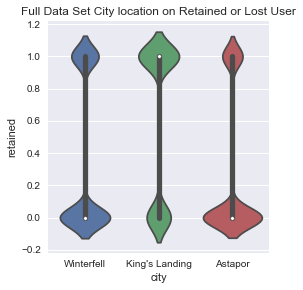

In [548]:
sns.factorplot( x= 'city', y='retained', data= data_df, kind='violin')
plt.title('Full Data Set City location on Retained or Lost User')
plt.show()

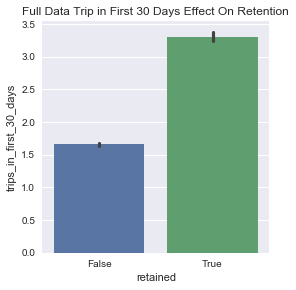

In [598]:
sns.factorplot( y= 'trips_in_first_30_days', 
              x='retained', data= data_df, kind='bar')
plt.title('Full Data Trip in First 30 Days Effect On Retention')
sns.despine()
plt.show()

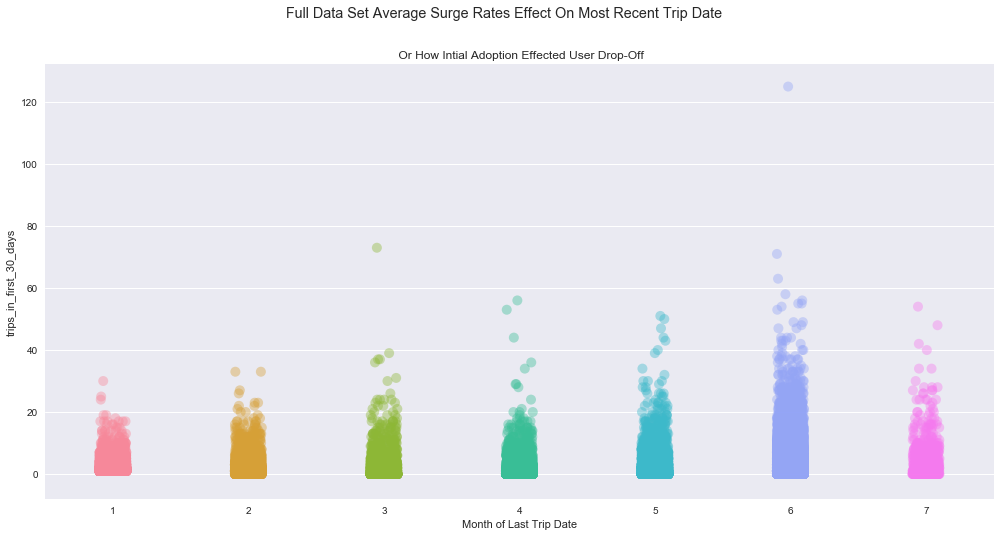

In [615]:
plt.figure(figsize=(17,8))
sns.stripplot( y= 'trips_in_first_30_days', x=data_df.last_trip_date.dt.month, alpha= 0.4, size= 10, 
              data= data_df, jitter=  True, edgecolor='black')
plt.title(' Or How Intial Adoption Effected User Drop-Off')
plt.suptitle('Full Data Set Look At Trip Rate in First Months Effect On Most Recent Trip Date')
sns.despine()
plt.show()

# Grouped Model
The single models all performed similar-ish, with a few features being strongest- if the user is at King's landing, if the user adopted use within the first 30 days etc) but to give a good recomendation I want to look briefly at models that contain multiple explanatory features, and miss the likely key (i.e. most important) expanatory features: King's Landing, early adoption etc. 

In [723]:
# I will build a function to test models containing all but one or
#two features from the 

for column in y_df.iteritems():
    col_name= column[0]
    print("Prediction model missing data on:", col_name)
    temp_df= y_df.drop([col_name], 1)
    col_list= temp_df.columns
    
    # selecting dependent and independent variables from df
    x1= data_df.as_matrix(columns= [col_list])
    y1= data_df.as_matrix(columns= ['retained'])
    
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.4)
    
    clf= LogisticRegression()
    clf.fit(X_train,y_train.ravel())
    print(accuracy_score(clf.predict(X_test), y_test))


Prediction model missing data on: avg_dist
0.73165
Prediction model missing data on: avg_rating_by_driver
0.7214
Prediction model missing data on: avg_rating_of_driver
0.7279
Prediction model missing data on: avg_surge
0.72605
Prediction model missing data on: surge_pct
0.72695
Prediction model missing data on: trips_in_first_30_days
0.7114
Prediction model missing data on: ultimate_black_user
0.7088
Prediction model missing data on: weekday_pct
0.7258
Prediction model missing data on: is_Astapor
0.72735
Prediction model missing data on: is_Kings
0.72475
Prediction model missing data on: is_Winterfell
0.72885
Prediction model missing data on: is_iPhone
0.72845
Prediction model missing data on: is_Android
0.72685


In [730]:
# just dropping locations as a single value

temp_df= y_df.drop(['is_Astapor', 'is_Kings', 'is_Winterfell'], 1)
col_list= temp_df.columns
    
# selecting dependent and independent variables from df
x1= data_df.as_matrix(columns= [col_list])
y1= data_df.as_matrix(columns= ['retained'])
    
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.4)
    
clf= LogisticRegression()
clf.fit(X_train,y_train.ravel())
print(accuracy_score(clf.predict(X_test), y_test))

0.6925


## 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

So the biggest single deciding factor is location. User retention rate is highest in Winterfell, so consider more user-intervention based on retaining users from the other two locations. I would also suggest that Ultimate should look into other factors that have an effect on user retention in Astapor and King's Landing - specifically check if the surge rates are higher, or user early adoption (i.e. user in the first 30 days) are lower. 
